In [3]:
import numpy as np
import scipy as sp
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

import nltk

import os
print(os.listdir("./"))

['.ipynb_checkpoints', 'hw1.ipynb', 'Reviews.csv']


In [4]:
data_path="./Reviews.csv"
pd_data=pd.read_csv(data_path)
pd_data=pd_data[:10000]

In [5]:
pd_data['Score count']=pd.Series(np.ones(len(pd_data)),index=pd_data.index)
pd_data['Score mean']=pd.Series(np.zeros(len(pd_data)),index=pd_data.index)
pd_data.head(10)

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Score count,Score mean
0,1,B001E4KFG0,A3SGXH7AUHU8GW,delmartian,1,1,5,1303862400,Good Quality Dog Food,I have bought several of the Vitality canned d...,1.0,0.0
1,2,B00813GRG4,A1D87F6ZCVE5NK,dll pa,0,0,1,1346976000,Not as Advertised,Product arrived labeled as Jumbo Salted Peanut...,1.0,0.0
2,3,B000LQOCH0,ABXLMWJIXXAIN,"Natalia Corres ""Natalia Corres""",1,1,4,1219017600,"""Delight"" says it all",This is a confection that has been around a fe...,1.0,0.0
3,4,B000UA0QIQ,A395BORC6FGVXV,Karl,3,3,2,1307923200,Cough Medicine,If you are looking for the secret ingredient i...,1.0,0.0
4,5,B006K2ZZ7K,A1UQRSCLF8GW1T,"Michael D. Bigham ""M. Wassir""",0,0,5,1350777600,Great taffy,Great taffy at a great price. There was a wid...,1.0,0.0
5,6,B006K2ZZ7K,ADT0SRK1MGOEU,Twoapennything,0,0,4,1342051200,Nice Taffy,I got a wild hair for taffy and ordered this f...,1.0,0.0
6,7,B006K2ZZ7K,A1SP2KVKFXXRU1,David C. Sullivan,0,0,5,1340150400,Great! Just as good as the expensive brands!,This saltwater taffy had great flavors and was...,1.0,0.0
7,8,B006K2ZZ7K,A3JRGQVEQN31IQ,Pamela G. Williams,0,0,5,1336003200,"Wonderful, tasty taffy",This taffy is so good. It is very soft and ch...,1.0,0.0
8,9,B000E7L2R4,A1MZYO9TZK0BBI,R. James,1,1,5,1322006400,Yay Barley,Right now I'm mostly just sprouting this so my...,1.0,0.0
9,10,B00171APVA,A21BT40VZCCYT4,Carol A. Reed,0,0,5,1351209600,Healthy Dog Food,This is a very healthy dog food. Good for thei...,1.0,0.0


In [6]:
sort=pd_data.sort_values(by=["ProfileName"])
sort[:20]

,Id,ProductId,UserId,ProfileName,HelpfulnessNumerator,HelpfulnessDenominator,Score,Time,Summary,Text,Score count,Score mean
5385,5386,B000H27K86,A1ER6IYOMM8VCT,"! MR. KNOW IT ALL ;-b ""DR SHOCK""",0,0,5,1199491200,"A TASTE OF ""N'AW'INS"" GREAT SPICE MIX FOR MANY...",I have been using this spice mix for many year...,1.0,0.0
6730,6731,B001LG945O,A3A1OA237FOZFK,#1 Amazon Fan,0,0,3,1237334400,Not as advertised,I wasn't sure what to expect from a carbonated...,1.0,0.0
1853,1854,B001RVFDOO,A3A1OA237FOZFK,#1 Amazon Fan,1,1,5,1296950400,This picky eater loves them (most flavors),"I was a little hesitant to try these, especial...",1.0,0.0
1967,1968,B001FQ0UEE,AC5L3IAZO1W07,#1aunt,0,0,5,1323043200,These candies are delightful,I ordered these candies for the first time and...,1.0,0.0
524,525,B000G6RYNE,ACYR6O588USK,"' Groovin' guy ""music historian""",14,17,5,1200614400,Delicious Extra Crunchy,These potato chips are excellent.There are no ...,1.0,0.0
1095,1096,B0025ULYKI,ACYR6O588USK,"' Groovin' guy ""music historian""",1,1,5,1259020800,Zesty and Spiced,"I'm not a potato chip addict, but sometimes li...",1.0,0.0
2888,2889,B000F9Z1WI,A3M8R4JD1SIS76,"'MaryLou Cheatham ""The Collard Patch""",7,7,5,1214438400,Yummy Cookies,"<a href=""http://www.amazon.com/gp/product/B000...",1.0,0.0
6740,6741,B001LG945O,A3M8R4JD1SIS76,"'MaryLou Cheatham ""The Collard Patch""",0,0,3,1236729600,The New Juice,"Switch has ""100% of what you want"" and ""0% of ...",1.0,0.0
1754,1755,B001RVFDOO,A2I5QH4F5FDKK5,*rose*,0,0,5,1270512000,So good!,These are crunchy and very tasty! These don't...,1.0,0.0
7449,7450,B007NVJ4CY,A1W4XQEXOKQKJD,*sallyp*,0,0,5,1341878400,My Fav!,This is my favorite of all the choices of coff...,1.0,0.0


作業第一小題
算出最多評論的次數與評分的平均值


In [43]:
review_count=pd.DataFrame(pd_data,columns=['UserId','ProfileName','Score','Score count'])
review_count=review_count.sort_values(by=["ProfileName"])
review_count=review_count.groupby(['ProfileName','UserId']).agg({'Score count':'sum',
                                          'Score':'sum'})
review_count=review_count.sort_values(by=["Score count"],ascending=False)
review_count['Score mean']=review_count['Score']/review_count['Score count']

count_result=pd.DataFrame(review_count,columns=['Score count','Score mean'])
count_result

,,Score count,Score mean
ProfileName,UserId,,
c2,A1Z54EM24Y40LL,17.0,3.882353
"Carrie, ""Formerly &#34;Sister Carrie&#34;""",A2SZLNSI5KOQJT,10.0,3.800000
M. Torma,A35R32TA60XD57,9.0,4.111111
"Rebecca of Amazon ""The Rebecca Review""",A281NPSIMI1C2R,8.0,5.000000
Citizen John,A3NHUQ33CFH3VM,7.0,3.142857
"C. F. Hill ""CFH""",A3OXHLG6DIBRW8,7.0,4.428571
Jared Castle,A3PJZ8TU8FDQ1K,7.0,4.714286
T.O. Perspective,ABQN42N7ICNZQ,6.0,4.333333
"LaVerne "":LaVerne""",A3TX6CWSZL02PW,6.0,5.000000


繪出最多筆評論使用者的分數分布
作業第二小題

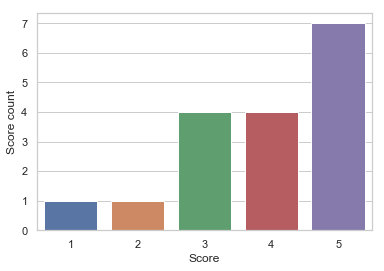

In [7]:
#print(pd_data.loc[pd_data['ProfileName']=='c2'])
reviewer_data=pd_data.loc[pd_data['ProfileName']=='c2']
reviewer_data=reviewer_data.groupby(['Score']).agg({'Score count':'sum'}).reset_index()

#plot reviewer data
sns.set(style='whitegrid')
tips=reviewer_data
ax=sns.barplot(x='Score',y='Score count',data=tips)

轉換時間至日期
作業第三小題

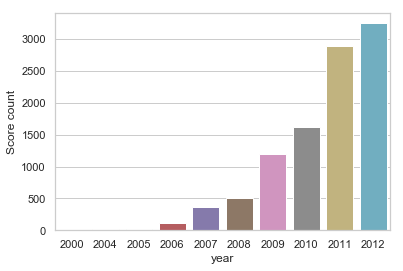

In [8]:
#No.3
#transfer time to date
#pd.to_datetime(1490195805, unit='s')
list(pd_data)
pd_data['date']=pd.to_datetime(pd_data['Time'],unit='s')
pd_data['year']=pd.DatetimeIndex(pd_data['date']).year
year_count=pd_data.groupby(['year']).agg({'Score count':'sum',}).reset_index()
#year_count

sns.set(style='whitegrid')
tips=year_count
ax=sns.barplot(x='year',y='Score count',data=tips)

plot a heat map by applying seaborn
作業第四小題

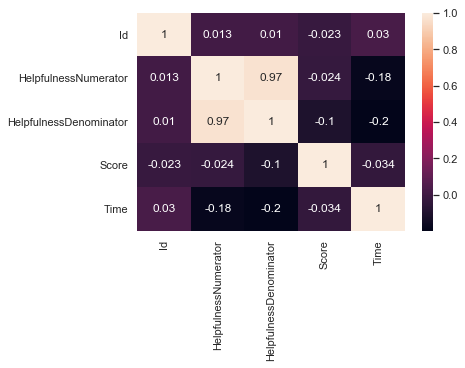

In [9]:
heatmap_input=pd_data[['Id','HelpfulnessNumerator','HelpfulnessDenominator','Score','Time']].corr()

#heatmap_input=heatmap_input.pivot('UserId','HelpfulnessNumerator')
#                                  'HelpfulnessDenominator',
#                                 'Score','Time'
#square=sns.heatmap(heatmap_input)
sns.heatmap(heatmap_input,xticklabels=heatmap_input.columns,yticklabels=heatmap_input.columns,annot=True)

plot the distribution of helpful percent (hist)

作業第五小題

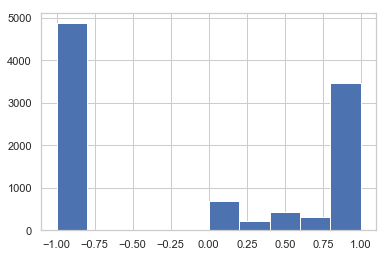

In [20]:
#def helpfulRatio(a,b):
#    return '-1' if a+b==0 else a/b

help_percent=pd.DataFrame(pd_data,columns=['HelpfulnessNumerator','HelpfulnessDenominator'])


#num=help_percent['HelpfulnessNumerator']
#den=help_percent['HelpfulnessDenominator']

help_percent['ratio']=np.where(help_percent['HelpfulnessDenominator']==0,-1,
                               help_percent['HelpfulnessNumerator']/help_percent['HelpfulnessDenominator'])
help_percent

help_percent['ratio'].hist()

#help_percent['ratio']=helpfulRatio(pd_data['HelpfulnessNumerator'],pd_data['HelpfulnessDenominator'])
